In [2]:
import pandas as pd
import yfinance as yf

In [3]:
df=yf.download("^NSEBANK")

[*********************100%%**********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.020020,0
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.567871,0
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.764160,0
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,7390.063965,0
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,7464.413086,0
...,...,...,...,...,...,...
2023-09-04,44647.648438,44656.050781,44310.949219,44578.300781,44578.300781,0
2023-09-05,44625.050781,44668.699219,44401.699219,44532.148438,44532.148438,225500
2023-09-06,44494.648438,44577.000000,44207.250000,44409.101562,44409.101562,252000


<Axes: xlabel='Date'>

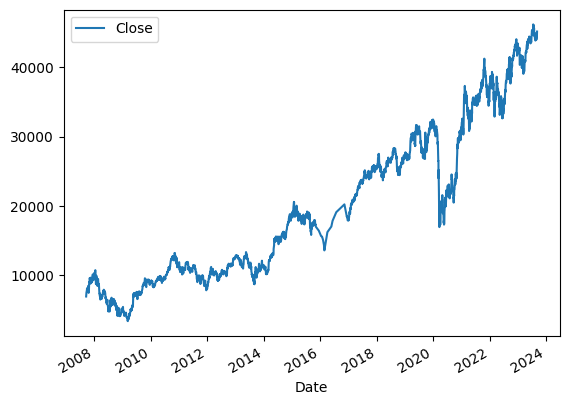

In [5]:
df.plot.line(y="Close", use_index=1)

In [6]:
df["Tomorrow"] = df["Close"].shift(-1)

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow
Date,,,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.020020,0,7059.649902
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.567871,0,7401.850098
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.764160,0,7390.149902
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,7390.063965,0,7464.500000
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,7464.413086,0,7650.899902
...,...,...,...,...,...,...,...
2023-09-04,44647.648438,44656.050781,44310.949219,44578.300781,44578.300781,0,44532.148438
2023-09-05,44625.050781,44668.699219,44401.699219,44532.148438,44532.148438,225500,44409.101562
2023-09-06,44494.648438,44577.000000,44207.250000,44409.101562,44409.101562,252000,44878.351562


In [8]:
df["Target"]=(df["Tomorrow"]>df["Close"]).astype(int)
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.020020,0,7059.649902,1
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.567871,0,7401.850098,1
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.764160,0,7390.149902,0
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,7390.063965,0,7464.500000,1
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,7464.413086,0,7650.899902,1
...,...,...,...,...,...,...,...,...
2023-09-04,44647.648438,44656.050781,44310.949219,44578.300781,44578.300781,0,44532.148438,0
2023-09-05,44625.050781,44668.699219,44401.699219,44532.148438,44532.148438,225500,44409.101562,0
2023-09-06,44494.648438,44577.000000,44207.250000,44409.101562,44409.101562,252000,44878.351562,1


In [11]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(n_estimators=1000, min_samples_split=100,random_state=1)

train = df.iloc[:-100]
test = df.iloc[-100:]
predictors = ["Close","Volume","Open","High","Low"]


In [13]:
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=1000, random_state=1)

In [14]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [15]:
preds = pd.Series(preds,index=test.index)

In [16]:
preds

Date
2023-04-19    1
2023-04-20    1
2023-04-21    1
2023-04-24    1
2023-04-25    1
             ..
2023-09-04    0
2023-09-05    0
2023-09-06    0
2023-09-07    0
2023-09-08    0
Length: 100, dtype: int32

In [17]:
precision_score(test["Target"],preds)

0.8888888888888888

In [18]:
combined =pd.concat([test["Target"],preds],axis=1)

<Axes: xlabel='Date'>

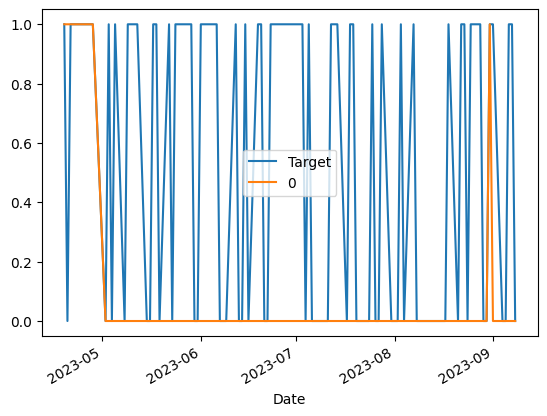

In [19]:
combined.plot()

In [20]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


In [21]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        return pd.concat(all_predictions)

In [22]:
predictions = backtest(df,model,predictors)

In [23]:
predictions["Predictions"].value_counts()

Predictions
0    229
1     21
Name: count, dtype: int64

In [24]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.512
0    0.488
Name: count, dtype: float64

In [25]:
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.020020,0,7059.649902,1
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.567871,0,7401.850098,1
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.764160,0,7390.149902,0
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,7390.063965,0,7464.500000,1
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,7464.413086,0,7650.899902,1
...,...,...,...,...,...,...,...,...
2023-09-04,44647.648438,44656.050781,44310.949219,44578.300781,44578.300781,0,44532.148438,0
2023-09-05,44625.050781,44668.699219,44401.699219,44532.148438,44532.148438,225500,44409.101562,0
2023-09-06,44494.648438,44577.000000,44207.250000,44409.101562,44409.101562,252000,44878.351562,1
